In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from math import sqrt
from sklearn  import metrics 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

In [2]:
#data
CensusData = pd.read_csv('censusdata_3.csv', header=1)
CensusData.head(10)

,AGE,CLASS-OF-WORKER,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION-CODE,RELATIONSHIP,RACE,SEX,CAPITAL-GAINS,CAPITAL-LOSSES,HOURS-PER-WEEK,NATIVE-COUNTRY,R-CLASS
0,46,Private,216414,Assoc-voc,11,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
1,24,Private,127753,12th,8,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,United-States,<=50K
2,19,Private,282698,7th-8th,4,Never-married,Adm-clerical,Own-child,White,Male,0,0,80,United-States,<=50K
3,35,Private,139364,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,40,United-States,>50K
4,36,Local-gov,312785,Bachelors,13,Never-married,Prof-specialty,Own-child,Black,Male,0,0,35,United-States,<=50K
5,18,Private,92864,12th,8,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
6,46,Local-gov,175428,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
7,30,Private,104223,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,32,United-States,<=50K
8,29,Private,144784,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
9,41,Private,211253,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K


In [3]:
#CensusData = CensusData.select_dtypes(include=[object])
CensusData.shape

(27504, 15)

In [4]:
#drop columns where amt1 to amt is 0
CensusData = CensusData.drop('FNLWGT', 1)
CensusData = CensusData.drop('RELATIONSHIP', 1)
CensusData = CensusData.drop('NATIVE-COUNTRY', 1)
CensusData = CensusData.drop('EDUCATION-NUM', 1)
CensusData.shape


(27504, 11)

In [5]:
CensusData.info()
CensusData.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27504 entries, 0 to 27503
Data columns (total 11 columns):
AGE                27504 non-null int64
CLASS-OF-WORKER    27504 non-null object
EDUCATION          27504 non-null object
MARITAL-STATUS     27504 non-null object
OCCUPATION-CODE    27504 non-null object
RACE               27504 non-null object
SEX                27504 non-null object
CAPITAL-GAINS      27504 non-null int64
CAPITAL-LOSSES     27504 non-null int64
HOURS-PER-WEEK     27504 non-null int64
R-CLASS            27504 non-null object
dtypes: int64(4), object(7)
memory usage: 2.3+ MB


,AGE,CLASS-OF-WORKER,EDUCATION,MARITAL-STATUS,OCCUPATION-CODE,RACE,SEX,CAPITAL-GAINS,CAPITAL-LOSSES,HOURS-PER-WEEK,R-CLASS
0,46,Private,Assoc-voc,Married-spouse-absent,Craft-repair,White,Male,0,0,40,<=50K
1,24,Private,12th,Never-married,Craft-repair,White,Male,0,0,40,<=50K
2,19,Private,7th-8th,Never-married,Adm-clerical,White,Male,0,0,80,<=50K
3,35,Private,HS-grad,Married-civ-spouse,Sales,White,Male,0,1902,40,>50K
4,36,Local-gov,Bachelors,Never-married,Prof-specialty,Black,Male,0,0,35,<=50K


In [6]:
CensusData[CensusData[['AGE','CLASS-OF-WORKER','EDUCATION','MARITAL-STATUS','OCCUPATION-CODE','RACE','SEX','CAPITAL-GAINS','CAPITAL-LOSSES','R-CLASS']].duplicated() == True]

,AGE,CLASS-OF-WORKER,EDUCATION,MARITAL-STATUS,OCCUPATION-CODE,RACE,SEX,CAPITAL-GAINS,CAPITAL-LOSSES,HOURS-PER-WEEK,R-CLASS
39,21,Private,Some-college,Never-married,Adm-clerical,White,Female,0,0,40,<=50K
73,46,Private,HS-grad,Divorced,Craft-repair,White,Male,0,0,40,<=50K
79,21,Private,Some-college,Never-married,Other-service,White,Female,0,0,40,<=50K
111,22,Private,HS-grad,Never-married,Adm-clerical,White,Female,0,0,40,<=50K
148,23,Private,HS-grad,Never-married,Machine-op-inspct,White,Female,0,0,40,<=50K
213,19,Private,HS-grad,Never-married,Handlers-cleaners,White,Male,0,0,20,<=50K
229,47,Private,Masters,Divorced,Prof-specialty,White,Female,0,0,40,<=50K
260,25,Private,HS-grad,Never-married,Machine-op-inspct,White,Male,0,0,40,<=50K
296,38,Private,HS-grad,Married-civ-spouse,Craft-repair,White,Male,0,0,40,<=50K
299,57,Self-emp-not-inc,HS-grad,Married-civ-spouse,Craft-repair,White,Male,0,0,50,>50K


In [7]:
CensusData_2 = CensusData.drop_duplicates(keep=False)

In [8]:
CensusData.groupby('R-CLASS')['R-CLASS'].count()

R-CLASS
<=50K    20509
>50K      6995
Name: R-CLASS, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
No handles with labels found to put in legend.


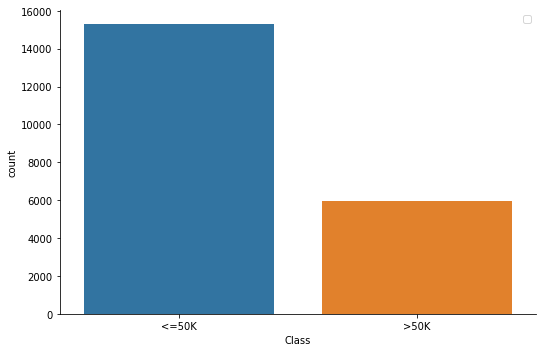

In [9]:
fg = sns.factorplot('R-CLASS', data=CensusData_2,kind='count', aspect=1.5)
fg.set_xlabels('Class')
plt.legend()
plt.show()


In [10]:
CensusData.groupby('SEX')['SEX'].count()

SEX
Female     8932
Male      18572
Name: SEX, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


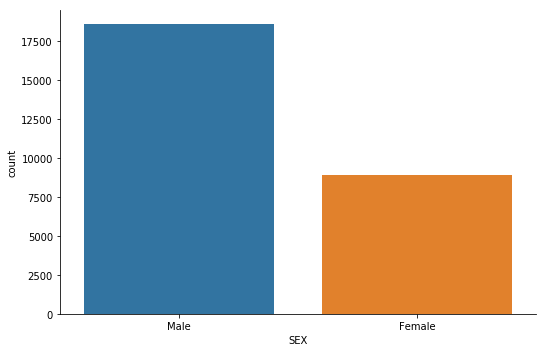

In [11]:
sns.factorplot('SEX', data=CensusData, kind='count', aspect=1.5)


In [12]:
# Number of men and women in each of the passenger class
CensusData.groupby(['SEX', 'R-CLASS'])['SEX'].count()

SEX     R-CLASS
Female  <=50K       7908
        >50K        1024
Male    <=50K      12601
        >50K        5971
Name: SEX, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


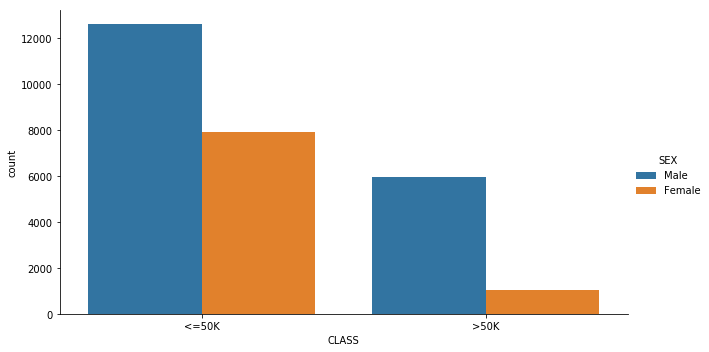

In [13]:
# Again use saeborn to group by Sex and class
g = sns.factorplot('R-CLASS', data=CensusData, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('CLASS')

In [14]:
CensusData.groupby(['CLASS-OF-WORKER', 'R-CLASS'])['CLASS-OF-WORKER'].count()

CLASS-OF-WORKER   R-CLASS
Federal-gov       <=50K        550
                  >50K         336
Local-gov         <=50K       1381
                  >50K         575
Private           <=50K      15594
                  >50K        4541
Self-emp-inc      <=50K        433
                  >50K         558
Self-emp-not-inc  <=50K       1654
                  >50K         659
State-gov         <=50K        884
                  >50K         326
Without-pay       <=50K         13
Name: CLASS-OF-WORKER, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


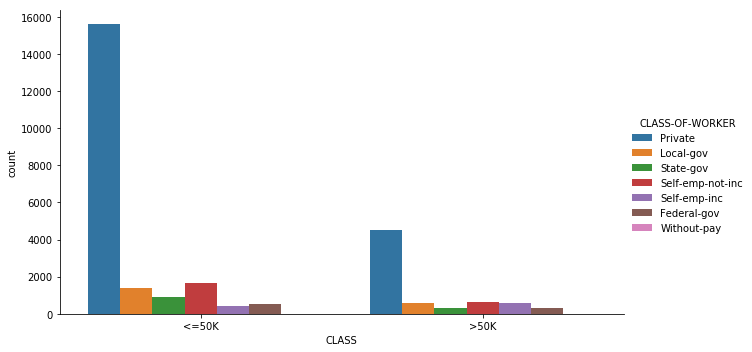

In [15]:
g = sns.factorplot('R-CLASS', data=CensusData, hue='CLASS-OF-WORKER', kind='count', aspect=1.75)
g.set_xlabels('CLASS')

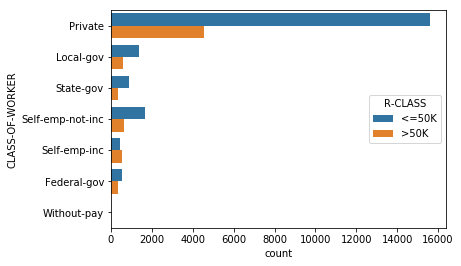

In [16]:
sns.countplot(y='CLASS-OF-WORKER', hue='R-CLASS', data=CensusData,)

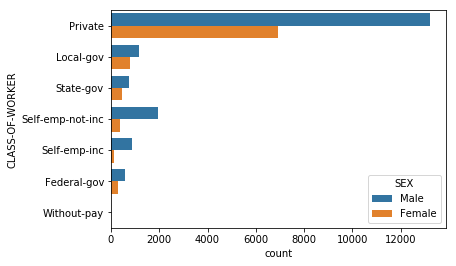

In [17]:
sns.countplot(y='CLASS-OF-WORKER', hue='SEX', data=CensusData,)

In [18]:
CensusData.groupby(['EDUCATION', 'R-CLASS'])['EDUCATION'].count()

EDUCATION     R-CLASS
10th          <=50K       695
              >50K         57
11th          <=50K       902
              >50K         55
12th          <=50K       305
              >50K         26
1st-4th       <=50K        38
              >50K          1
5th-6th       <=50K        75
              >50K          3
7th-8th       <=50K       408
              >50K         29
9th           <=50K       328
              >50K         22
Assoc-acdm    <=50K       698
              >50K        241
Assoc-voc     <=50K       910
              >50K        323
Bachelors     <=50K      2643
              >50K       1975
Doctorate     <=50K        75
              >50K        239
HS-grad       <=50K      7668
              >50K       1541
Masters       <=50K       635
              >50K        849
Preschool     <=50K        15
Prof-school   <=50K       121
              >50K        367
Some-college  <=50K      4993
              >50K       1267
Name: EDUCATION, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


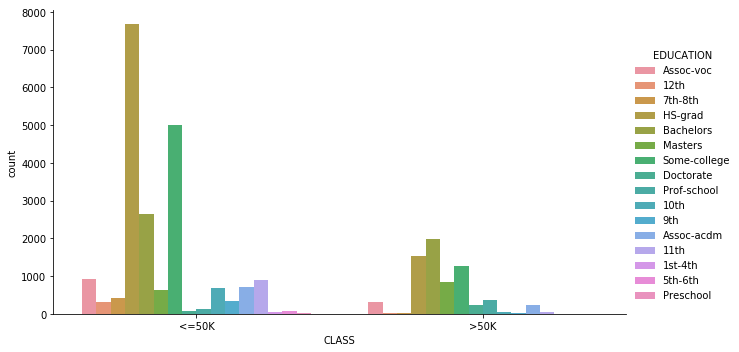

In [19]:
g = sns.factorplot('R-CLASS', data=CensusData, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('CLASS')

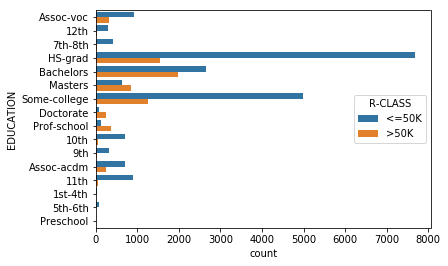

In [20]:
sns.countplot(y='EDUCATION', hue='R-CLASS', data=CensusData,)

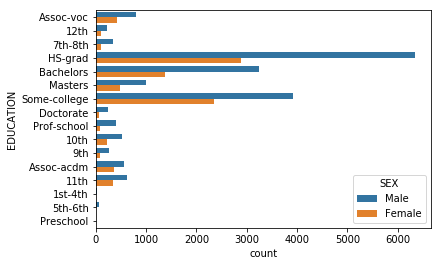

In [21]:
sns.countplot(y='EDUCATION', hue='SEX', data=CensusData,)

In [22]:
CensusData.groupby(['MARITAL-STATUS', 'R-CLASS'])['MARITAL-STATUS'].count()

MARITAL-STATUS         R-CLASS
Divorced               <=50K      3564
                       >50K        429
Married-AF-spouse      <=50K        11
                       >50K         10
Married-civ-spouse     <=50K      6839
                       >50K       5959
Married-spouse-absent  <=50K       208
                       >50K         25
Never-married          <=50K      8435
                       >50K        441
Separated              <=50K       765
                       >50K         60
Widowed                <=50K       687
                       >50K         71
Name: MARITAL-STATUS, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


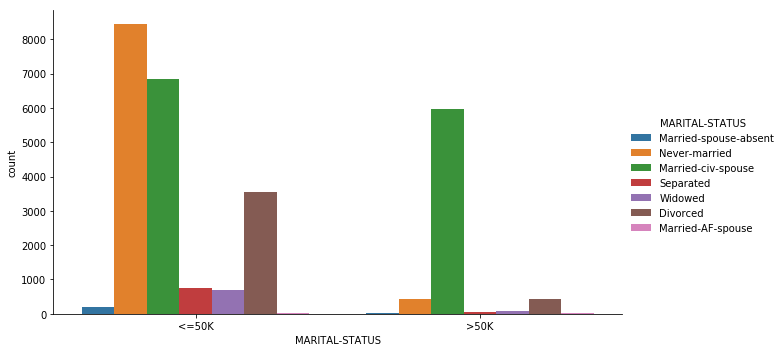

In [23]:
g = sns.factorplot('R-CLASS', data=CensusData, hue='MARITAL-STATUS', kind='count', aspect=1.75)
g.set_xlabels('MARITAL-STATUS')

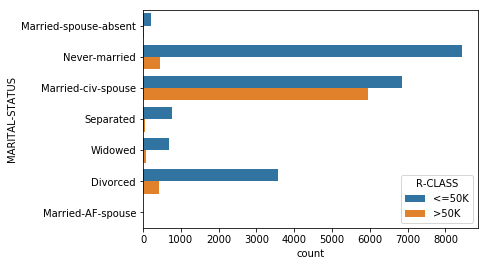

In [24]:
sns.countplot(y='MARITAL-STATUS', hue='R-CLASS', data=CensusData,)

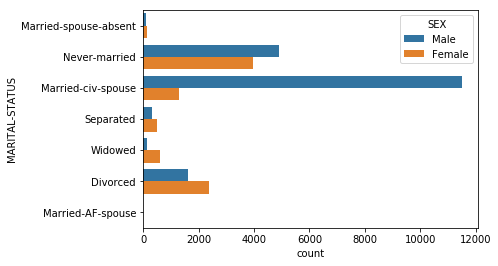

In [25]:
sns.countplot(y='MARITAL-STATUS', hue='SEX', data=CensusData,)

In [26]:
CensusData.groupby(['OCCUPATION-CODE', 'R-CLASS'])['OCCUPATION-CODE'].count()

OCCUPATION-CODE    R-CLASS
Adm-clerical       <=50K      2991
                   >50K        458
Armed-Forces       <=50K         8
                   >50K          1
Craft-repair       <=50K      2825
                   >50K        860
Exec-managerial    <=50K      1917
                   >50K       1818
Farming-fishing    <=50K       768
                   >50K        111
Handlers-cleaners  <=50K      1116
                   >50K         73
Machine-op-inspct  <=50K      1463
                   >50K        224
Other-service      <=50K      2671
                   >50K        106
Priv-house-serv    <=50K        89
                   >50K          1
Prof-specialty     <=50K      2043
                   >50K       1650
Protective-serv    <=50K       403
                   >50K        203
Sales              <=50K      2436
                   >50K        928
Tech-support       <=50K       593
                   >50K        257
Transport-moving   <=50K      1186
                   >50K     

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


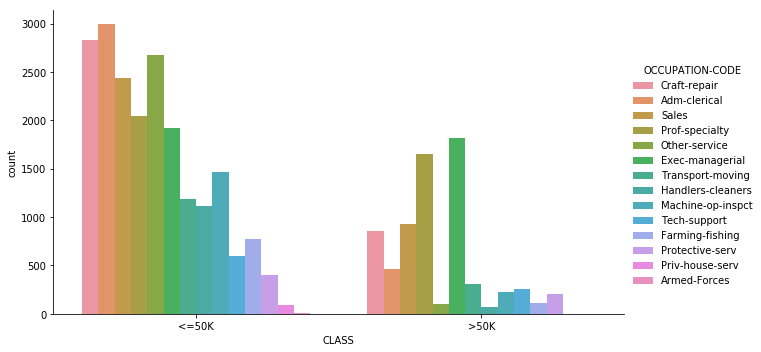

In [27]:
g = sns.factorplot('R-CLASS', data=CensusData, hue='OCCUPATION-CODE', kind='count', aspect=1.75)
g.set_xlabels('CLASS')

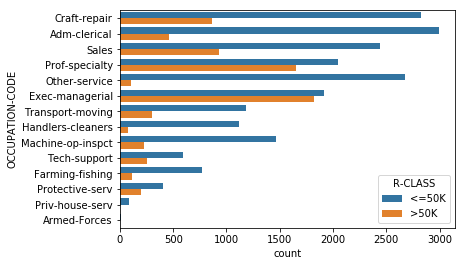

In [28]:
sns.countplot(y='OCCUPATION-CODE', hue='R-CLASS', data=CensusData,)

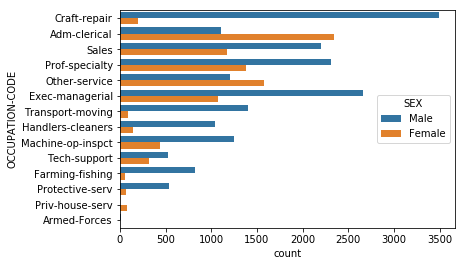

In [29]:
sns.countplot(y='OCCUPATION-CODE', hue='SEX', data=CensusData,)

In [30]:
CensusData.groupby(['RACE', 'R-CLASS'])['RACE'].count()

RACE                R-CLASS
Amer-Indian-Eskimo  <=50K        238
                    >50K          33
Asian-Pac-Islander  <=50K        206
                    >50K          67
Black               <=50K       2286
                    >50K         343
Other               <=50K        100
                    >50K          13
White               <=50K      17679
                    >50K        6539
Name: RACE, dtype: int64

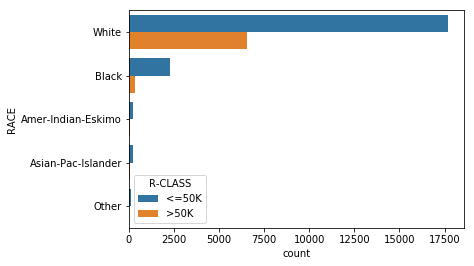

In [31]:
sns.countplot(y='RACE', hue='R-CLASS', data=CensusData,)

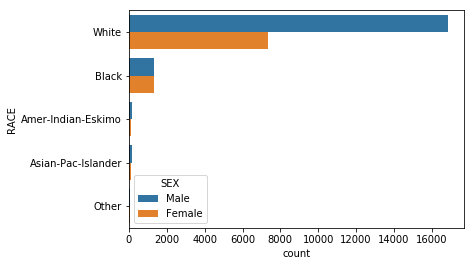

In [32]:
sns.countplot(y='RACE', hue='SEX', data=CensusData,)

In [33]:

CensusData.AGE.describe()

count    27504.000000
mean        38.504290
std         13.184357
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: AGE, dtype: float64

In [34]:

print('Average and median age of people are %0.f and %0.f years old, respectively'%(CensusData.AGE.mean(), 
                                                                          CensusData.AGE.median()))

Average and median age of people are 39 and 37 years old, respectively


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Citizens Ages')

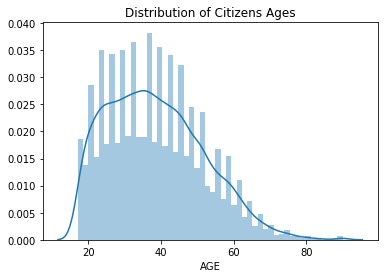

In [35]:
# Distribution of age, with an overlay of a density plot
age = CensusData['AGE']
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Citizens Ages")

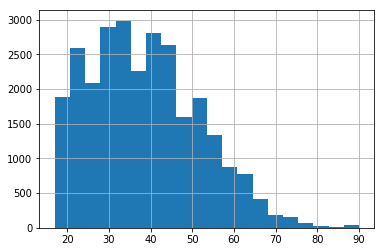

In [36]:
# Another way to plot a histogram of ages is shown below
CensusData['AGE'].hist(bins=20)

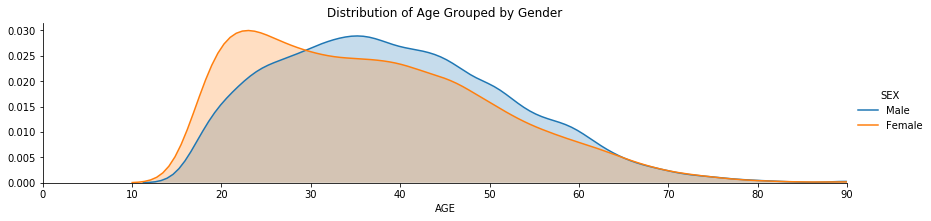

In [37]:
##Distribution Of Citizens AGES By CLASS
#GROUPED BY GENDER
fig = sns.FacetGrid(CensusData, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = CensusData['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

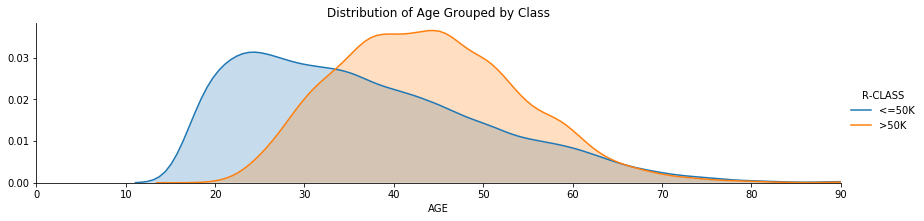

In [38]:
##GROUPED BY CLASS
fig = sns.FacetGrid(CensusData, hue='R-CLASS', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = CensusData['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

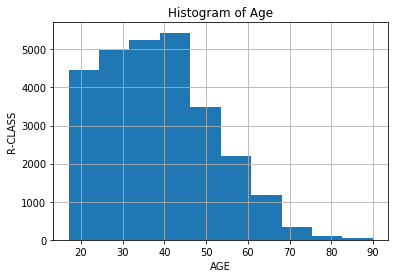

In [39]:
CensusData.AGE.hist()
plt.title('Histogram of Age')
plt.xlabel('AGE')
plt.ylabel('R-CLASS')
plt.savefig('hist_age')
#most of them occur between 30 and 40

In [40]:

sumf=CensusData.groupby('R-CLASS')['HOURS-PER-WEEK'].sum()
sumf


R-CLASS
<=50K    806841
>50K     320025
Name: HOURS-PER-WEEK, dtype: int64

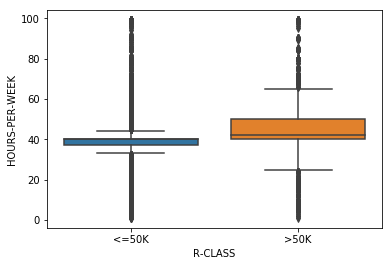

In [41]:
sns.boxplot(x="R-CLASS", y="HOURS-PER-WEEK", data=CensusData)


In [42]:
CensusData.groupby('SEX')['HOURS-PER-WEEK'].sum()

SEX
Female    329293
Male      797573
Name: HOURS-PER-WEEK, dtype: int64

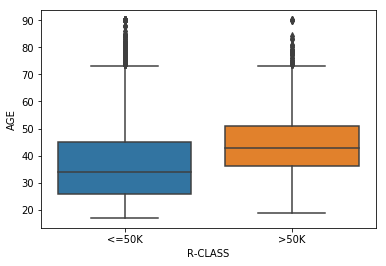

In [43]:
sns.boxplot(x="R-CLASS", y="AGE", data=CensusData)

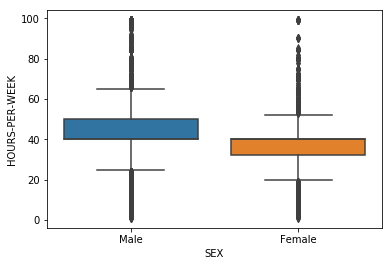

In [44]:
sns.boxplot(x="SEX", y="HOURS-PER-WEEK", data=CensusData)

In [45]:
CensusData.groupby('SEX')['CAPITAL-GAINS'].sum()

SEX
Female     5202952
Male      25615274
Name: CAPITAL-GAINS, dtype: int64

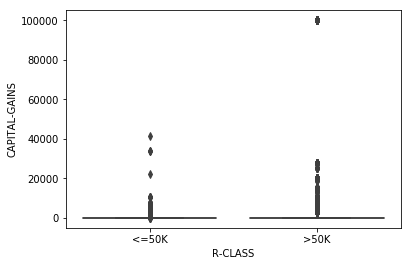

In [46]:
sns.boxplot(x="R-CLASS", y="CAPITAL-GAINS", data=CensusData)

In [47]:
CensusData.groupby('SEX')['CAPITAL-LOSSES','CAPITAL-GAINS'].sum()

,CAPITAL-LOSSES,CAPITAL-GAINS
SEX,,
Female,566120,5202952
Male,1916741,25615274


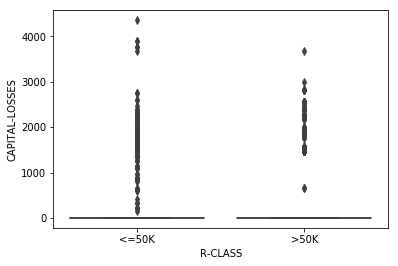

In [48]:
sns.boxplot(x="R-CLASS", y="CAPITAL-LOSSES", data=CensusData)

In [49]:
CensusData.groupby('R-CLASS')['CAPITAL-LOSSES','CAPITAL-GAINS'].sum()

,CAPITAL-LOSSES,CAPITAL-GAINS
R-CLASS,,
<=50K,1121010,3078194
>50K,1361851,27740032


In [50]:
#pd.get_dummies(CensusData,columns = [R_CLASS])
dummy = pd.get_dummies(CensusData_2,columns = ['CLASS-OF-WORKER','EDUCATION','MARITAL-STATUS','OCCUPATION-CODE','RACE','SEX','R-CLASS'], drop_first=True)
dummy.head


<bound method NDFrame.head of        AGE  CAPITAL-GAINS  CAPITAL-LOSSES  HOURS-PER-WEEK  \
0       46              0               0              40   
1       24              0               0              40   
2       19              0               0              80   
3       35              0            1902              40   
4       36              0               0              35   
6       46              0               0              40   
7       30              0               0              32   
8       29              0               0              40   
9       41              0               0              40   
11      58              0               0              40   
12      39              0               0              40   
14      31              0               0              50   
15      33              0               0              50   
16      28              0               0              60   
17      32           2977               0              

In [51]:
#CensusData_2 = pd.concat([CensusData_2, dummy], axis =1)
CensusData_2.head(3)

,AGE,CLASS-OF-WORKER,EDUCATION,MARITAL-STATUS,OCCUPATION-CODE,RACE,SEX,CAPITAL-GAINS,CAPITAL-LOSSES,HOURS-PER-WEEK,R-CLASS
0,46,Private,Assoc-voc,Married-spouse-absent,Craft-repair,White,Male,0,0,40,<=50K
1,24,Private,12th,Never-married,Craft-repair,White,Male,0,0,40,<=50K
2,19,Private,7th-8th,Never-married,Adm-clerical,White,Male,0,0,80,<=50K


In [52]:
CensusData_2 = CensusData_2.merge(dummy, left_index=True, right_index = True)
CensusData_2.head(5)

,AGE_x,CLASS-OF-WORKER,EDUCATION,MARITAL-STATUS,OCCUPATION-CODE,RACE,SEX,CAPITAL-GAINS_x,CAPITAL-LOSSES_x,HOURS-PER-WEEK_x,...,OCCUPATION-CODE_Protective-serv,OCCUPATION-CODE_Sales,OCCUPATION-CODE_Tech-support,OCCUPATION-CODE_Transport-moving,RACE_Asian-Pac-Islander,RACE_Black,RACE_Other,RACE_White,SEX_Male,R-CLASS_>50K
0,46,Private,Assoc-voc,Married-spouse-absent,Craft-repair,White,Male,0,0,40,...,0,0,0,0,0,0,0,1,1,0
1,24,Private,12th,Never-married,Craft-repair,White,Male,0,0,40,...,0,0,0,0,0,0,0,1,1,0
2,19,Private,7th-8th,Never-married,Adm-clerical,White,Male,0,0,80,...,0,0,0,0,0,0,0,1,1,0
3,35,Private,HS-grad,Married-civ-spouse,Sales,White,Male,0,1902,40,...,0,1,0,0,0,0,0,1,1,1
4,36,Local-gov,Bachelors,Never-married,Prof-specialty,Black,Male,0,0,35,...,0,0,0,0,0,1,0,0,1,0


In [53]:
CensusData_2.columns

Index(['AGE_x', 'CLASS-OF-WORKER', 'EDUCATION', 'MARITAL-STATUS',
       'OCCUPATION-CODE', 'RACE', 'SEX', 'CAPITAL-GAINS_x', 'CAPITAL-LOSSES_x',
       'HOURS-PER-WEEK_x', 'R-CLASS', 'AGE_y', 'CAPITAL-GAINS_y',
       'CAPITAL-LOSSES_y', 'HOURS-PER-WEEK_y', 'CLASS-OF-WORKER_Local-gov',
       'CLASS-OF-WORKER_Private', 'CLASS-OF-WORKER_Self-emp-inc',
       'CLASS-OF-WORKER_Self-emp-not-inc', 'CLASS-OF-WORKER_State-gov',
       'CLASS-OF-WORKER_Without-pay', 'EDUCATION_11th', 'EDUCATION_12th',
       'EDUCATION_1st-4th', 'EDUCATION_5th-6th', 'EDUCATION_7th-8th',
       'EDUCATION_9th', 'EDUCATION_Assoc-acdm', 'EDUCATION_Assoc-voc',
       'EDUCATION_Bachelors', 'EDUCATION_Doctorate', 'EDUCATION_HS-grad',
       'EDUCATION_Masters', 'EDUCATION_Preschool', 'EDUCATION_Prof-school',
       'EDUCATION_Some-college', 'MARITAL-STATUS_Married-AF-spouse',
       'MARITAL-STATUS_Married-civ-spouse',
       'MARITAL-STATUS_Married-spouse-absent', 'MARITAL-STATUS_Never-married',
       'MARITAL-S

In [54]:
CensusData_2 = CensusData_2.drop('CLASS-OF-WORKER',1)
CensusData_2.columns


Index(['AGE_x', 'EDUCATION', 'MARITAL-STATUS', 'OCCUPATION-CODE', 'RACE',
       'SEX', 'CAPITAL-GAINS_x', 'CAPITAL-LOSSES_x', 'HOURS-PER-WEEK_x',
       'R-CLASS', 'AGE_y', 'CAPITAL-GAINS_y', 'CAPITAL-LOSSES_y',
       'HOURS-PER-WEEK_y', 'CLASS-OF-WORKER_Local-gov',
       'CLASS-OF-WORKER_Private', 'CLASS-OF-WORKER_Self-emp-inc',
       'CLASS-OF-WORKER_Self-emp-not-inc', 'CLASS-OF-WORKER_State-gov',
       'CLASS-OF-WORKER_Without-pay', 'EDUCATION_11th', 'EDUCATION_12th',
       'EDUCATION_1st-4th', 'EDUCATION_5th-6th', 'EDUCATION_7th-8th',
       'EDUCATION_9th', 'EDUCATION_Assoc-acdm', 'EDUCATION_Assoc-voc',
       'EDUCATION_Bachelors', 'EDUCATION_Doctorate', 'EDUCATION_HS-grad',
       'EDUCATION_Masters', 'EDUCATION_Preschool', 'EDUCATION_Prof-school',
       'EDUCATION_Some-college', 'MARITAL-STATUS_Married-AF-spouse',
       'MARITAL-STATUS_Married-civ-spouse',
       'MARITAL-STATUS_Married-spouse-absent', 'MARITAL-STATUS_Never-married',
       'MARITAL-STATUS_Separated', '

In [55]:
CensusData_2 = CensusData_2.drop('AGE_x', 1) 

In [56]:
CensusData_2 = CensusData_2.drop('CAPITAL-GAINS_x', 1) 

In [57]:
CensusData_2 = CensusData_2.drop('CAPITAL-LOSSES_x', 1) 

In [58]:
CensusData_2 = CensusData_2.drop('HOURS-PER-WEEK_x',1)

In [59]:
CensusData_2 = CensusData_2.drop('EDUCATION', 1) 


In [60]:
CensusData_2 = CensusData_2.drop('MARITAL-STATUS', 1) 


In [61]:

CensusData_2 = CensusData_2.drop('OCCUPATION-CODE',1) 

 

In [62]:
CensusData_2 = CensusData_2.drop('SEX',1) 

In [63]:
CensusData_2 = CensusData_2.drop('RACE',1) 

In [64]:
CensusData_2 = CensusData_2.drop('R-CLASS',1)

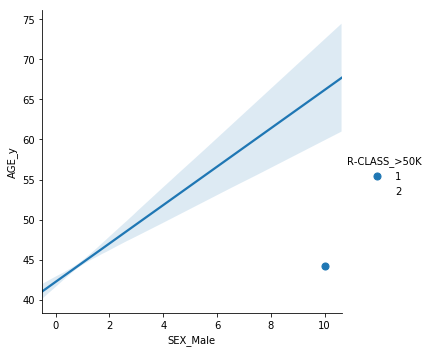

In [66]:
# Survived vs. Age grouped by Sex
#sns.lmplot('AGE_y', 'R-CLASS_>50K', data=CensusData_2, hue='SEX_Male')
generations = [10,20,40,50,60,70,80,90]
sns.lmplot('SEX_Male','AGE_y',hue='R-CLASS_>50K',data=CensusData_2,x_bins=generations, hue_order=[1,2])

In [68]:
CensusData_2.columns
len(CensusData_2.columns)

50

In [69]:
#features
features = CensusData_2.iloc[:,0:48]
print('Summary of feature sample')
features.head()

print(CensusData_2.keys())

depVar = CensusData_2['R-CLASS_>50K']
# build train and test dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 100)

#X = CensusData_2.iloc[:,1:100]
#Y = CensusData_2.iloc[:,100:101]

#Training Set (Feature Space: X Training)
X_train = (features[: 15000])
X_train.head()

Summary of feature sample
Index(['AGE_y', 'CAPITAL-GAINS_y', 'CAPITAL-LOSSES_y', 'HOURS-PER-WEEK_y',
       'CLASS-OF-WORKER_Local-gov', 'CLASS-OF-WORKER_Private',
       'CLASS-OF-WORKER_Self-emp-inc', 'CLASS-OF-WORKER_Self-emp-not-inc',
       'CLASS-OF-WORKER_State-gov', 'CLASS-OF-WORKER_Without-pay',
       'EDUCATION_11th', 'EDUCATION_12th', 'EDUCATION_1st-4th',
       'EDUCATION_5th-6th', 'EDUCATION_7th-8th', 'EDUCATION_9th',
       'EDUCATION_Assoc-acdm', 'EDUCATION_Assoc-voc', 'EDUCATION_Bachelors',
       'EDUCATION_Doctorate', 'EDUCATION_HS-grad', 'EDUCATION_Masters',
       'EDUCATION_Preschool', 'EDUCATION_Prof-school',
       'EDUCATION_Some-college', 'MARITAL-STATUS_Married-AF-spouse',
       'MARITAL-STATUS_Married-civ-spouse',
       'MARITAL-STATUS_Married-spouse-absent', 'MARITAL-STATUS_Never-married',
       'MARITAL-STATUS_Separated', 'MARITAL-STATUS_Widowed',
       'OCCUPATION-CODE_Armed-Forces', 'OCCUPATION-CODE_Craft-repair',
       'OCCUPATION-CODE_Exec-manager

,AGE_y,CAPITAL-GAINS_y,CAPITAL-LOSSES_y,HOURS-PER-WEEK_y,CLASS-OF-WORKER_Local-gov,CLASS-OF-WORKER_Private,CLASS-OF-WORKER_Self-emp-inc,CLASS-OF-WORKER_Self-emp-not-inc,CLASS-OF-WORKER_State-gov,CLASS-OF-WORKER_Without-pay,...,OCCUPATION-CODE_Priv-house-serv,OCCUPATION-CODE_Prof-specialty,OCCUPATION-CODE_Protective-serv,OCCUPATION-CODE_Sales,OCCUPATION-CODE_Tech-support,OCCUPATION-CODE_Transport-moving,RACE_Asian-Pac-Islander,RACE_Black,RACE_Other,RACE_White
0,46,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,24,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,0,0,80,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35,0,1902,40,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,36,0,0,35,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [70]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 15000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 15000


0    0
1    0
2    0
3    1
4    0
Name: R-CLASS_>50K, dtype: uint8

In [71]:
#Testing Set (X Testing)
X_test = features[-6000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 6000
       AGE_y  CAPITAL-GAINS_y  CAPITAL-LOSSES_y  HOURS-PER-WEEK_y  \
19698     26                0                 0                40   
19699     53                0              1740                40   
19700     36                0                 0                40   
19701     30             4787                 0                45   
19702     53                0                 0                40   

       CLASS-OF-WORKER_Local-gov  CLASS-OF-WORKER_Private  \
19698                          1                        0   
19699                          0                        1   
19700                          1                        0   
19701                          0                        1   
19702                          1                        0   

       CLASS-OF-WORKER_Self-emp-inc  CLASS-OF-WORKER_Self-emp-not-inc  \
19698                             0                                 0   
19699    

In [72]:
#Ground Truth (y_test) 
y_test = depVar[-6000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 6000


19698    0
19699    0
19700    0
19701    1
19702    0
Name: R-CLASS_>50K, dtype: uint8

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((11250, 48), (3750, 48), (11250,), (3750,))

In [74]:
#Models
modelKNN1 = KNeighborsClassifier(n_neighbors=1)
modelKNN1.fit(X_train,y_train)
KNNFit1 = modelKNN1.fit(X_train,y_train)
scoresKNN1= cross_val_score(modelKNN1, X_train, y_train)
print("CROSS VAL KNN1:",cross_val_score(modelKNN1, X_train, y_train))
predictions1 = modelKNN1.predict(X_test)
##print(predictions1)
print("Accuracy KNN1:",accuracy_score(y_test, predictions1))
#predictions1
#modelKNN1
cohen_kappa_score(y_test, predictions1)
print("KAPPA KNN1:",cohen_kappa_score(y_test, predictions1))
print("AccuracyKNN1: %0.2f (+/- %0.2f)" % (scoresKNN1.mean(), scoresKNN1.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CROSS VAL KNN1: [0.77366036 0.7736     0.76740464]
Accuracy KNN1: 0.7818666666666667
KAPPA KNN1: 0.4645868023919486
AccuracyKNN1: 0.77 (+/- 0.01)


In [75]:
#Models
modelKNN3 = KNeighborsClassifier(n_neighbors=3)
modelKNN3.fit(X_train,y_train)
KNNFit = modelKNN3.fit(X_train,y_train)
scoresKNN3= cross_val_score(modelKNN3, X_train, y_train)
print("CROSS VAL KNN3:",cross_val_score(modelKNN3, X_train, y_train))

predictions3 = modelKNN3.predict(X_test)
##print(predictions3)
print("Accuracy KNN3:",accuracy_score(y_test, predictions3))
print("KAPPA KNN3:",cohen_kappa_score(y_test, predictions3))
print("AccuracyKNN3: %0.2f (+/- %0.2f)" % (scoresKNN3.mean(), scoresKNN3.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CROSS VAL KNN3: [0.79658758 0.79733333 0.79781275]
Accuracy KNN3: 0.8096
KAPPA KNN3: 0.5147849686454138
AccuracyKNN3: 0.80 (+/- 0.00)


In [76]:
#Model KNN5
modelKNN5 = KNeighborsClassifier(n_neighbors=5)
modelKNN5.fit(X_train,y_train)
KNNFit5 = modelKNN5.fit(X_train,y_train)
scoresKNN5= cross_val_score(modelKNN5, X_train, y_train)
print("CROSS VAL KNN5:",cross_val_score(modelKNN5, X_train, y_train))
predictions5 = modelKNN5.predict(X_test)
#print(predictions5)
predictions5
modelKNN5
cohen_kappa_score(y_test, predictions5)
print("Accuracy KNN5:",accuracy_score(y_test, predictions5))
print("KAPPA KNN5:",cohen_kappa_score(y_test, predictions5))
print("AccuracyKNN5: %0.2f (+/- %0.2f)" % (scoresKNN5.mean(), scoresKNN5.std() * 2))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CROSS VAL KNN5: [0.79712077 0.8064     0.79941318]
Accuracy KNN5: 0.8168
KAPPA KNN5: 0.5226806587701698
AccuracyKNN5: 0.80 (+/- 0.01)


In [77]:
#Models
modelKNN7 = KNeighborsClassifier(n_neighbors=7)
modelKNN7.fit(X_train,y_train)
KNNFit7 = modelKNN7.fit(X_train,y_train)
scoresKNN7= cross_val_score(modelKNN7, X_train, y_train)
print("CROSS VAL KNN7:",cross_val_score(modelKNN7, X_train, y_train))

predictions7 = modelKNN7.predict(X_test)
print("Accuracy KNN7:",accuracy_score(y_test, predictions7))
##predictions7
##modelKNN7
print("KAPPA KNN7:",cohen_kappa_score(y_test, predictions7))
print("AccuracyKNN7: %0.2f (+/- %0.2f)" % (scoresKNN7.mean(), scoresKNN7.std() * 2))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CROSS VAL KNN7: [0.80565183 0.80986667 0.80448119]
Accuracy KNN7: 0.8234666666666667
KAPPA KNN7: 0.5322325236794919
AccuracyKNN7: 0.81 (+/- 0.00)


In [78]:
print(confusion_matrix(y_test,predictions7))

[[2476  250]
 [ 412  612]]


In [79]:
modelGauNB = GaussianNB()
modelGauNB.fit(X_train,y_train)
modelGauNB = modelGauNB.fit(X_train,y_train)
predictGauNB = modelGauNB.predict(X_test)
scoresGauNB= cross_val_score(modelGauNB, X_train, y_train)
print("CROSS VAL GauNB:",cross_val_score(modelGauNB, X_train, y_train))
print("Accuracy GauNB:",accuracy_score(y_test, predictGauNB))
print("AccuracyGauNB: %0.2f (+/- %0.2f)" % (scoresGauNB.mean(), scoresGauNB.std() * 2))

CROSS VAL GauNB: [0.80191949 0.8136     0.80234729]
Accuracy GauNB: 0.8024
AccuracyGauNB: 0.81 (+/- 0.01)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [80]:
print(confusion_matrix(y_test,predictGauNB))  

[[2428  298]
 [ 443  581]]


In [81]:
modelRF3 = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=0)
modelRF3.fit(X_train,y_train)
predictRF3 = modelRF3.predict(X_test)
scoresRF3= cross_val_score(modelRF3, X_train, y_train)
print(modelRF3.feature_importances_)
print("CROSS VAL RF3:",cross_val_score(modelRF3, X_train, y_train))
print("Accuracy RF3:",accuracy_score(y_test, predictRF3))
print("AccuracyRF3: %0.2f (+/- %0.2f)" % (scoresRF3.mean(), scoresRF3.std() * 2))

[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.1 0.  0.  0.  0.  0.1 0.  0.  0.3 0.  0.2 0.  0.  0.  0.  0.  0.  0.
 0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]
CROSS VAL RF3: [0.71927486 0.7192     0.71939184]
Accuracy RF3: 0.7269333333333333
AccuracyRF3: 0.72 (+/- 0.00)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [82]:
print(confusion_matrix(y_test,predictRF3)) 

[[2726    0]
 [1024    0]]


In [85]:
modelRF5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
modelRF5.fit(X_train,y_train)
scoresRF5= cross_val_score(modelRF5, X_train, y_train)

print(modelRF5.feature_importances_)
print("CROSS VAL RF5:",cross_val_score(modelRF5, X_train, y_train))
predictRF5 = modelRF5.predict(X_test)
print("Accuracy RF5:",accuracy_score(y_test, predictRF5))
print("AccuracyRF5: %0.2f (+/- %0.2f)" % (scoresRF5.mean(), scoresRF5.std() * 2))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[8.41344285e-02 2.27790884e-01 6.59705492e-02 5.04286673e-02
 3.59418927e-04 1.85967871e-03 5.55271417e-03 1.38501934e-03
 3.38542570e-04 5.48497940e-07 2.32226003e-03 1.88581230e-04
 2.37814058e-05 2.08390651e-04 1.50327416e-03 1.77508638e-03
 2.59465056e-04 1.96743577e-04 2.66285739e-02 7.01985770e-03
 1.01635760e-02 2.04211937e-02 4.57762998e-07 1.46448010e-02
 1.00378076e-03 6.82394400e-04 2.80351675e-01 2.58054704e-04
 8.71456719e-02 2.38944622e-03 2.33021515e-03 3.04746670e-06
 6.05409386e-04 3.42010923e-02 3.81871092e-03 2.34676517e-03
 6.32134859e-04 2.08410348e-02 6.79072676e-06 2.66150484e-02
 4.75355965e-05 5.47763610e-04 3.66715902e-04 1.35083114e-03
 2.99773743e-04 3.19105051e-03 2.06861606e-05 7.76787670e-03]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CROSS VAL RF5: [0.80831778 0.81626667 0.81355028]
Accuracy RF5: 0.8192
AccuracyRF5: 0.81 (+/- 0.01)


In [84]:
print(confusion_matrix(y_test,predictRF5)) 

[[2694   32]
 [ 652  372]]
